### Importación de librerías

In [1]:
from selenium import webdriver # Webscrapping bot
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options

from selenium.webdriver.common.by import By

In [2]:
import logging # Para generar logs
from logging.handlers import TimedRotatingFileHandler
from logging import Formatter

import datetime
import os
import time

In [3]:
import pandas as pd #Manejo de dataframes
import yaml
import dropbox

### Variables a modificar para adaptar el código

In [4]:
urlToScrap = "https://worldpostalcode.com/lookup"
deleteOldLogs = True

pathToDF = "../Outputs/"
fileToDF = "ProdsToScrap.csv"

dropboxDir = '/test/'
localDir = 'data/'

### Importación de credenciales de API

In [5]:
try:
    conf = yaml.safe_load(open('config.yml', "r"))
    if conf:
        print("Credenciales cargadas")
except FileNotFoundError:
    raise Exception("Configuración no encontrada, ¿es correcta la ruta?")

Credenciales cargadas


In [6]:
accessToken = conf["dropbox"]["accessToken"]

print("Credenciales guardadas")

Credenciales guardadas


### Activación de la API

In [7]:
try:
    dropboxApi = dropbox.Dropbox(accessToken)
except dropbox.auth.AuthError as err:
    print(err)

### Pequeñas funciones de apoyo

In [8]:
# Esta función se ha creado para mejorar comprensión de código en la configuración de logs

def UTCFormatter(logFormatter):
    '''
    Recibe un formatter de logeo
    Devuelve el horario a tiempo GMT
    '''
    logFormatter.converter = time.gmtime
    return logFormatter

In [9]:
# Esta función permite la subida de un archivo a dropbox

def upDropbox():
    try:
        with open( file_path, 'rb' ) as f:
            dbx.files_upload(f=f.read(), path=dest_path, mode=dropbox.files.WriteMode.overwrite, mute=True)
            
    except Exception as err:
        print("La carga de {} falló: {}".format(file, err))

### Configuración de logs

In [10]:
# Se inicia el proceso de registro de logs a nivel de INFO.
logger = logging.getLogger('ScrapLog')
logger.setLevel(logging.INFO)

# Variables que determinan apartados posteriores
timestamp = datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S')
filename=f'ScrapImages{timestamp}.log'
formatter = logging.Formatter('[%(asctime)s] %(name)s {%(filename)s:%(lineno)d} %(levelname)s - %(message)s')

In [11]:
'''
Indican como se debe crear el archivo de log
Si "deleteOldLogs" es True, sólo se conservará el último archivo de log
'''

if deleteOldLogs ==True:
    listFilesinCWD = os.listdir(os.getcwd())
    for element in listFilesinCWD:
        if element.endswith(".log"):
            os.remove(os.path.join(os.getcwd(), element))

fileHandler = logging.FileHandler(filename=filename)
logging.Formatter.converter = time.gmtime

fileHandler.setLevel(logging.INFO)
fileHandler.setFormatter(UTCFormatter(formatter))
logger.addHandler(fileHandler)

### Importación de datos

In [12]:
df = pd.read_csv(f"{pathToDF}{fileToDF}")
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [13]:
print(df.shape)
df.head(2)

(19778, 3)


,id,product_id,name
0,0,5645,Weleda Hombre Crema Hidratante
1,1,28743,Gynea Gestagyn Men


### Lógica del Scrapping

In [14]:
urlToScrap ="https://images.google.com/"

In [25]:
logger.info("Starting Webscrapping!")

opts = Options()
opts.add_argument("--headless")
opts.add_argument("--no-sandbox")
opts.add_argument("−−incognito")
driver = webdriver.Chrome(options=opts)


driver.get(urlToScrap)
driver.set_page_load_timeout(5)

acceptCookie = driver.find_element(By.XPATH, "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/button[2]/div")
acceptCookie.click()

driver.set_page_load_timeout(5)
print(driver.current_url)

selectImageBox = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
selectImageBox.send_keys("ejemplo")
selectImageBox.send_keys(Keys.ENTER)

driver.set_page_load_timeout(5)
print(driver.current_url)

selectImage = driver.find_element(By.XPATH, "/html/body/div[2]/c-wiz/div[4]/div[1]/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[1]/a[1]/div[1]/img")




https://images.google.com/
https://www.google.com/search?q=ejemplo&tbm=isch&source=hp&biw=&bih=&ei=AY1QYszsMM34aMuws5AK&iflsig=AHkkrS4AAAAAYlCbEcS1Pugzs8QWOZz5Cjl8pfnxA25c


In [26]:
selectImage.image

AttributeError: 'WebElement' object has no attribute 'image'

''
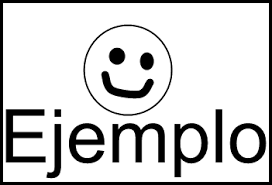

In [20]:
selectImage.get_attribute("src")